# Real State Data Exploratory Analysis 

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Basics for Data Analysis 
import numpy as np
import pandas as pd
# Basics for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

og_set = original data set

In [3]:
og_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_sets/Melbourne_Housing.csv")

##  Data Sanity Check

Basic knowlege of the data frame 
1. head()
2. shape
3. info()
4. describe()

In [4]:
og_set.head() # also can use tail()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.5,3042.0,3.0,2.0,1.0,303.0,225,2016.0,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.3,3206.0,2.0,1.0,0.0,120.0,82,1900.0,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.3,3206.0,2.0,1.0,0.0,159.0,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.4,3078.0,3.0,2.0,4.0,853.0,263,1930.0,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.4,3078.0,3.0,2.0,2.0,208.0,inf,2013.0,Northern Metropolitan,2211,1110000


In [5]:
og_set.shape

(27114, 16)

In [6]:
og_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


In [7]:
og_set.describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Propertycount,Price
count,27114.000000,27113.000000,27113.000000,20678.000000,20672.000000,20297.000000,17873.000000,11985.000000,27114.000000,2.711400e+04
mean,2.992218,11.278737,3113.782687,3.046184,1.591525,1.715820,560.536564,1966.618273,7564.205245,1.050564e+06
std,0.954722,6.783544,111.114271,0.955024,0.701106,0.994487,1411.309127,36.042000,4493.596054,6.415785e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,50.000000,1850.000000,83.000000,8.500000e+04
25%,2.000000,6.400000,3046.000000,2.000000,1.000000,1.000000,220.000000,1950.000000,4294.000000,6.350000e+05
50%,3.000000,10.500000,3088.000000,3.000000,1.000000,2.000000,513.000000,1970.000000,6567.000000,8.710000e+05
75%,4.000000,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,2000.000000,10412.000000,1.300000e+06
max,16.000000,48.100000,3978.000000,20.000000,9.000000,18.000000,76000.000000,2019.000000,21650.000000,1.120000e+07


In [8]:
# Building area should be a numeric type of value but it is as a string(object) 
type("BuildingArea")

str

In [9]:
# And if we have a date in a data set as an string(object) it is recommended to change it to a real date format 
type("Date")

str

In [10]:
og_set["Date"] = pd.to_datetime(og_set["Date"])

In [11]:
og_set.info() # now date is in datatime64 dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10543 non-null  object        
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [12]:
og_set["BuildingArea"].unique()

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

In [13]:
# there are some strings into this particular column that change the whole dtype 
# with a quick scan you can say its "inf" and "missing"
# so what we will try to do is to change those strings into something py understands (nan)

In [14]:
# check how many are strings and how many are actually numeric values 
og_set["BuildingArea"].apply(type).value_counts()

<class 'float'>    16571
<class 'str'>      10543
Name: BuildingArea, dtype: int64

In [15]:
# using numpy replace we will change the strings inf and missing with not a number
og_set["BuildingArea"] = og_set["BuildingArea"].replace(["inf", "missing"], np.nan)
# there is other way to do oit throught importing again the data set and adding at the end
# "link to the dataset", na_values = ["missing", "inf"] 

In [16]:
# now to be able to work properly with ease we will make every entry of the column a float 
og_set["BuildingArea"] = og_set["BuildingArea"].astype(float)

In [17]:
og_set["BuildingArea"].apply(type).value_counts()

<class 'float'>    27114
Name: BuildingArea, dtype: int64

In [18]:
# to know how many nan are
og_set.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

In [19]:
# as you can see distance to yearbuildt 
#8 columns 

In [20]:
# to know if theres dupliates 
og_set.duplicated().sum()

11

In [21]:
# lets remove those duplicates 
og_set.drop_duplicates(inplace=True)
# this last line of code ruins the index so lets fix the index 
og_set.reset_index(drop=True, inplace=True)

In [22]:
# now we dont have duplicates
og_set.duplicated().sum()

0

In [23]:
og_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27103.0,2.992473e+00,0.954667,1.0,2.0,3.0,4.0,16.0
Distance,27102.0,1.127993e+01,6.783958,0.0,6.4,10.5,14.0,48.1
Postcode,27102.0,3.113787e+03,111.129025,3000.0,3046.0,3088.0,3153.0,3978.0
Bedroom,20678.0,3.046184e+00,0.955024,0.0,2.0,3.0,4.0,20.0
Bathroom,20672.0,1.591525e+00,0.701106,0.0,1.0,1.0,2.0,9.0
Car,20297.0,1.715820e+00,0.994487,0.0,1.0,2.0,2.0,18.0
Landsize,17873.0,5.605366e+02,1411.309127,50.0,220.0,513.0,664.0,76000.0
BuildingArea,10529.0,1.545119e+02,130.583872,11.0,101.0,133.0,183.0,6791.0
YearBuilt,11985.0,1.966618e+03,36.042000,1850.0,1950.0,1970.0,2000.0,2019.0
Propertycount,27103.0,7.564741e+03,4494.028347,83.0,4294.0,6567.0,10412.0,21650.0


In [24]:
#postcode it apears a number even though we know it should be more a string so lets see 
# the total number of unique values in the postcode column 
og_set["Postcode"].nunique() 
# unique gives you all 
# nunique the number of unique values

209

In [25]:
# lets see the number of categorical variables 
# this is a really useful code
categorical_columns = ["Suburb", "Type", "SellerG", "Regionname"]
for i in categorical_columns:
    print(og_set[i].value_counts())
    print("-" * 50)

Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: Suburb, Length: 345, dtype: int64
--------------------------------------------------
h    18394
u     5882
t     2827
Name: Type, dtype: int64
--------------------------------------------------
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: SellerG, Length: 347, dtype: int64
--------------------------------------------------
Southern Metropolitan         8480
Northern Metropolitan         7809
Western Metropolitan          5792
Eastern Metropolitan          3264
South-Eastern Metropolitan    1336
Northern Victoria              165
Eastern Victor

In [26]:
# lets see it but in percentage 
for i in categorical_columns:
    print(og_set[i].value_counts(normalize = True))
    print("-" * 50)

Reservoir         0.026713
Bentleigh East    0.018190
Richmond          0.016124
Preston           0.015127
Brunswick         0.014131
                    ...   
Wandin North      0.000037
Ferny Creek       0.000037
Tecoma            0.000037
Montrose          0.000037
viewbank          0.000037
Name: Suburb, Length: 345, dtype: float64
--------------------------------------------------
h    0.678670
u    0.217024
t    0.104306
Name: Type, dtype: float64
--------------------------------------------------
Nelson           0.100838
Jellis           0.092831
Barry            0.087998
hockingstuart    0.077335
Ray              0.058075
                   ...   
Allan            0.000037
Jim              0.000037
iProperty        0.000037
Batty            0.000037
Icon             0.000037
Name: SellerG, Length: 347, dtype: float64
--------------------------------------------------
Southern Metropolitan         0.312880
Northern Metropolitan         0.288123
Western Metropolitan          0.

### Analysis post sanity check of the data set 


### **Preliminary** Results

*   The ds had some issues with strings making a whole column an object dtype so I changed that, remove any kind of string and replacing them with nan 
*   The date was not in datetime64 dtype so it had to be done manually 
*   There are probably outliers because some of the max values in the columns rooms, bedrooms, bathroom and cars
*  Reservoir is the suburn with more entrys, h the type of house more common, Nelson the guy with more sells and the southern metropolitan is the region with more houses in this particular dataset









## Univariate Analysis 

### Distance

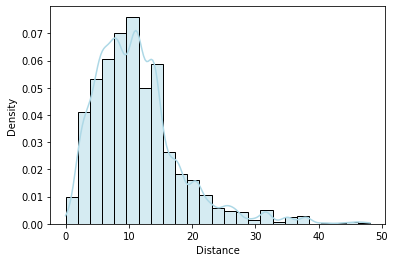

In [36]:
sns.histplot(data = og_set, x = "Distance", stat = "density", bins = 25, kde = True, color = "lightblue");

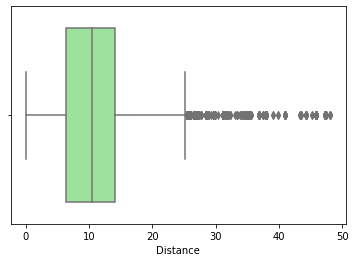

In [38]:
sns.boxplot(data = og_set, x = "Distance", color = "lightgreen");
# a lot of outliers 


*   Skewed towards right 
*   Many outliers 
*   If distance is gretear than 25 km is an outlier



In [126]:
# how many outliers are 
og_set.loc[og_set["Distance"]>25].shape
# a lot

(1206, 16)

### Landsize

It is in sqmeters so to make it easear I will divide them by a million sqmeters so that will give me a sqkilometer scale

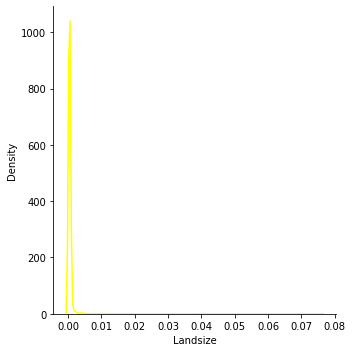

In [100]:
sns.displot(data = og_set, x = og_set["Landsize"]/1000000, kind = "kde", color = "yellow");

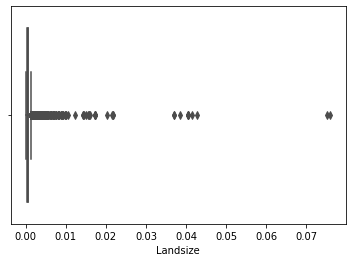

In [99]:
sns.boxplot(data = og_set, x = og_set["Landsize"]/1000000, color = "blue");



*   Highly skewed to right 
*   Many outliers 



In [111]:
# To see wich rows have a ls greater than 0.01 skm
og_set.loc[og_set["Landsize"]>60000]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
23897,Silvan,3,h,Harcourts,2017-05-27,34.6,3795.0,3.0,2.0,2.0,76000.0,NaN,NaN,Eastern Victoria,457,1085000
25079,Balwyn North,3,h,Kay,2016-08-28,9.2,3104.0,3.0,1.0,2.0,75100.0,NaN,NaN,Southern Metropolitan,7809,2000000


### Building Area

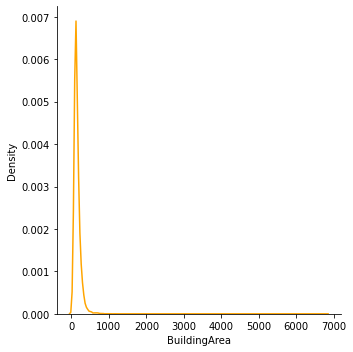

In [112]:
sns.displot(data = og_set, x = og_set["BuildingArea"], kind = "kde", color = "orange");

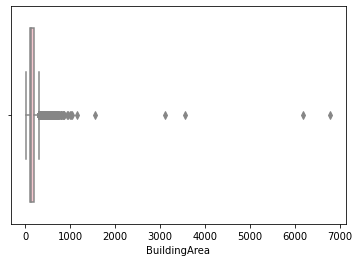

In [114]:
sns.boxplot(data = og_set, x = og_set["BuildingArea"], color = "pink");



*   Also skewed towards right
*   It has many outliers but after 2k there are a few ones that I may have to check out in detail later 



### Price

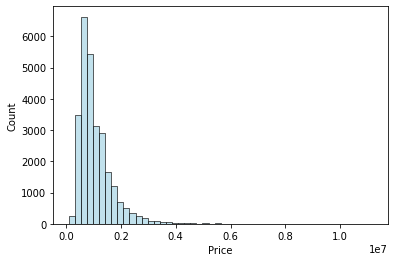

In [117]:
sns.histplot(data = og_set, x = og_set["Price"], bins = 50, color = "lightblue");

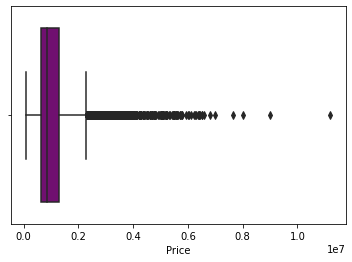

In [122]:
sns.boxplot(data = og_set, x = "Price", color = "purple");



*  Skewed right
*  outliers greater than 7 Million will need more analysis 



### Rooms 

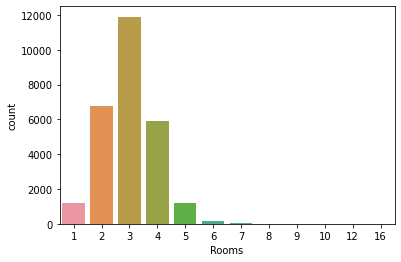

In [134]:
sns.countplot( data = og_set, x ="Rooms");

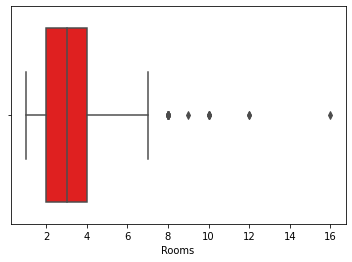

In [123]:
sns.boxplot(data = og_set, x = "Rooms", color = "red");

In [124]:
# how many houses has more than seven rooms 
og_set.loc[og_set["Rooms"]>7].shape

(23, 16)

In [128]:
# what type are the properties 
og_set.loc[og_set["Rooms"]>7, "Type"].value_counts() # if you use normalize = True it will be in %

h    21
u     2
Name: Type, dtype: int64



*  Skewed right but the most normal distibution in the whole data frame
*  Its pretty rare to see a house with more than 7 rooms and for that instance there are not as many outliers as in Distance for example



### Region Name

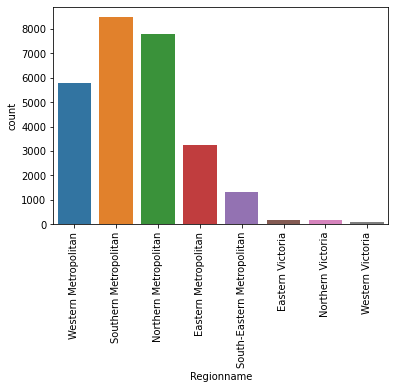

In [131]:
sns.countplot(data = og_set, x = "Regionname" );
plt.xticks(rotation = 90);